In [31]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

import tensorflow as tf


In [18]:
df = pd.read_csv('../TF_2_Notebooks_and_Data/DATA/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
df['date'] = df['date'].apply(pd.to_datetime)
df=df.drop('zipcode', axis=1)
df['year'] = df['date'].apply(lambda d: d.year)
df['month'] = df['date'].apply(lambda d: d.month)
df = df.drop('date', axis=1)

X = df.drop('price', axis=1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X.shape

(21597, 20)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')




In [27]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=400, verbose=2, validation_data=(X_test, y_test))

54/400
119/119 - 0s - loss: 33944907776.0000 - val_loss: 36073574400.0000
Epoch 155/400
119/119 - 0s - loss: 33906952192.0000 - val_loss: 36035039232.0000
Epoch 156/400
119/119 - 0s - loss: 33872476160.0000 - val_loss: 36002062336.0000
Epoch 157/400
119/119 - 0s - loss: 33848897536.0000 - val_loss: 35969142784.0000
Epoch 158/400
119/119 - 0s - loss: 33803313152.0000 - val_loss: 35966996480.0000
Epoch 159/400
119/119 - 0s - loss: 33789487104.0000 - val_loss: 35901202432.0000
Epoch 160/400
119/119 - 0s - loss: 33738215424.0000 - val_loss: 35872956416.0000
Epoch 161/400
119/119 - 0s - loss: 33703608320.0000 - val_loss: 35852451840.0000
Epoch 162/400
119/119 - 0s - loss: 33679693824.0000 - val_loss: 35819212800.0000
Epoch 163/400
119/119 - 0s - loss: 33644230656.0000 - val_loss: 35778859008.0000
Epoch 164/400
119/119 - 0s - loss: 33624244224.0000 - val_loss: 35750486016.0000
Epoch 165/400
119/119 - 0s - loss: 33602103296.0000 - val_loss: 35712995328.0000
Epoch 166/400
119/119 - 0s - loss: 

<AxesSubplot:>

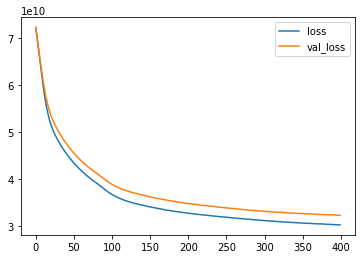

In [30]:
losses_df = pd.DataFrame(model.history.history)
losses_df.head()
losses_df.plot()

In [32]:
predictions = model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, predictions))

179527.3915453859

In [34]:
mean_absolute_error(y_test, predictions)

108587.02722137827

In [35]:
explained_variance_score(y_test, predictions)

0.756988256301181

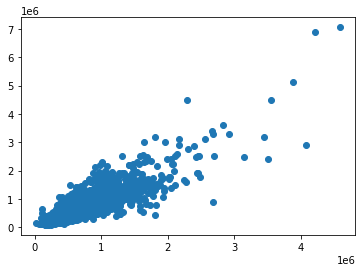

In [36]:
plt.scatter(predictions, y_test)

In [47]:
# predict one house
house = df.drop('price', axis=1).iloc[101]
house = (house.values).reshape(-1,house.shape[0])
house = scaler.transform(house)

In [50]:
print('predicted:', model.predict(house))
print(df['price'].iloc[101])

predicted: [[594353.3]]
555000.0
